In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation as anim
from anim_scripts.Lecture_1.detuning.utils import (
    initialize_ax_dict,
    fade_in_texts,
    calculate_labframe_B_fields,
    calculate_rotating_frame_B_fields,
    update_bloch_sphere_vectors,
    calculate_bloch_vectors,
)
from matplotlib.patches import FancyArrowPatch
from anim_base import (
    cache_then_save_funcanimation,
    prepare_bloch_mosaic,
    PrettyAxis,
    file_type,
    math_fontfamily,
    bloch_vector,
    PrettySlider,
)
import matplotlib.lines as lines
import qutip

In [2]:
N_time = 950
omega_0 = 24/528 * np.pi
omega_d = omega_0 - 10/528 * np.pi
psi_0 = qutip.basis(2, 0)
# precessing_bloch_vector_lab, precessing_bloch_vector_rot = calculate_bloch_vectors(
#     omega_d, omega_0, 4/100 * np.pi, np.arange(N_time), psi_0
# )
N_time = 620
t_0 = 20 # Show decomposed bloch sphere and pretty axis
t_001= 70 #Subtle Appearence of decomposition
t_01 = 80#Show the decomposition
t_002 = 170 #Subtle Disappearance of the decomposition
t_02 = 180 #Hide B_x total
t_1 = 100 # Show B_dec time evolution
t_2 = 120 # Show B_dec equation 
t_3 = 160 # Let it sink in for a bit
t_4 = 180 # Show W transformation equation
t_5 = 220 # Let it sink in for a bit
t_6 = 320 # Show rot sphere and rot field time evolution
t_7 = 390 # Show static sphere and static + rot field time evolution + pretty_plot
t_8 = 410 # Show B_rot equation version 1
t_9 = 460 # Let it sink in for a bit
t_10 = 480# Show B_rot equation version 2
t_11 = 520# Let it sink in for a bit
t_12 = 560# Fade out counter rotating arrows and equation
t_13 = 620# Show time evolution of B_rot
t_14 = N_time

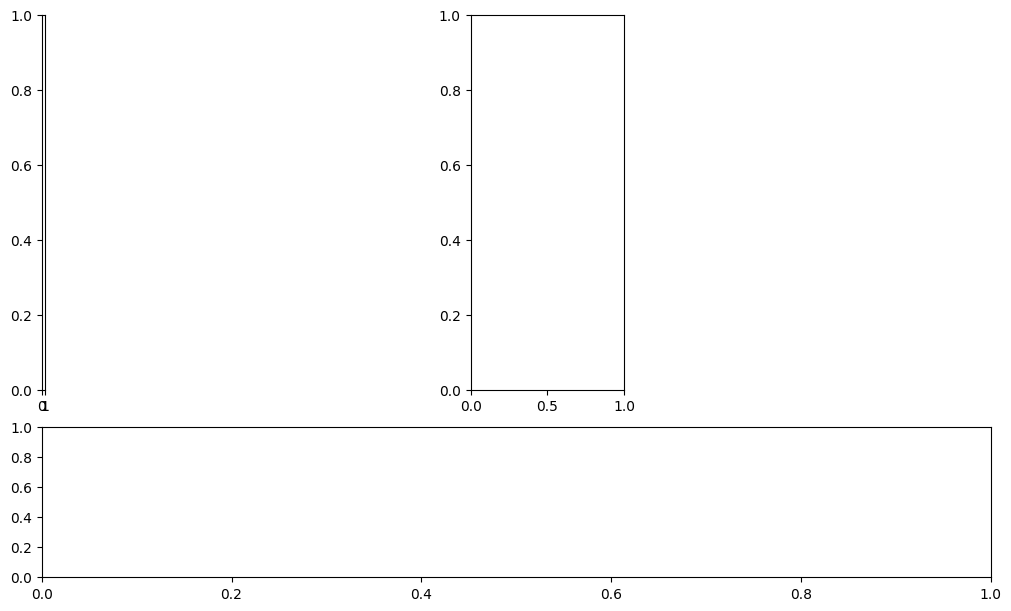

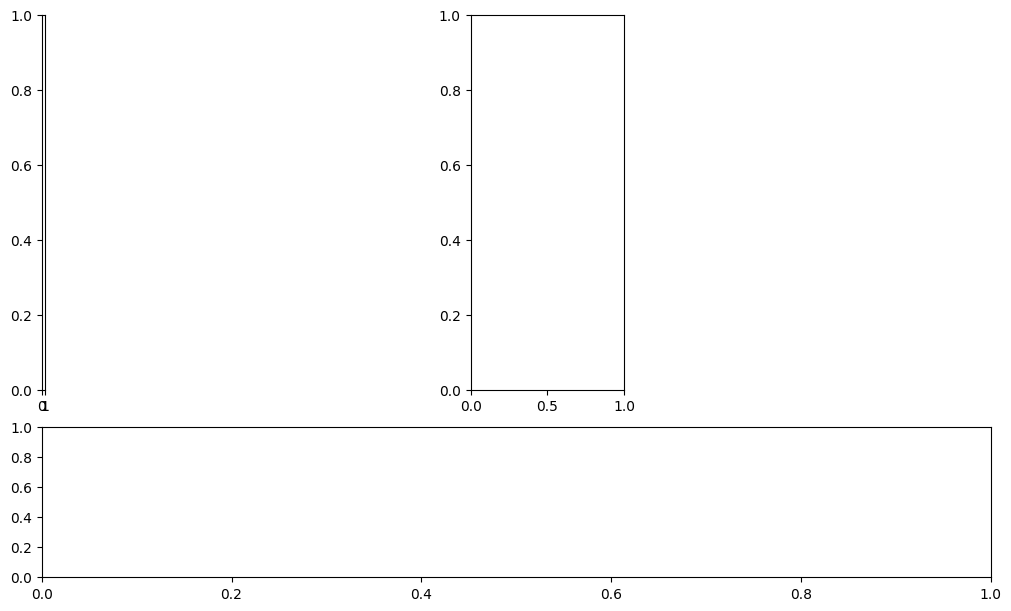

In [3]:
settings = {
    "B_x_max": 0.7,
    "B_zeeman_lab_z": 1,
    "phi_0": 0,
    "phi_end": 24*np.pi,
    "arrow_length": 0.2,
    # "time_list": time_list,
    "vector_colors": ["maroon", "hotpink", "red"],
}
bloch_mosaic = [["spin_plots", "bloch_lab", "plot_between", "bloch_rot"],
                ["plot", "plot", "plot", "plot"]]
bloch_kwargs = [{
    "vector_color": settings['vector_colors'],
    "vector_alpha" : [1,1,0],
    "vector_width": 6,
    },
    {
    "vector_color": settings['vector_colors'][:],
    "vector_width": 6,
    "xlabel": [r"$x^\prime$", ''],
    "ylabel": [r"$y^\prime$", '']
    }
]

gridspec_kw = {"height_ratios":[1,0.4], "width_ratios":[0.01, 1, 0.5, 1]}
fig, ax_dict, sphere_dict = prepare_bloch_mosaic(bloch_mosaic, (10,6), bloch_kwargs, gridspec_kw=gridspec_kw)

fig


(0.0, 100.0)

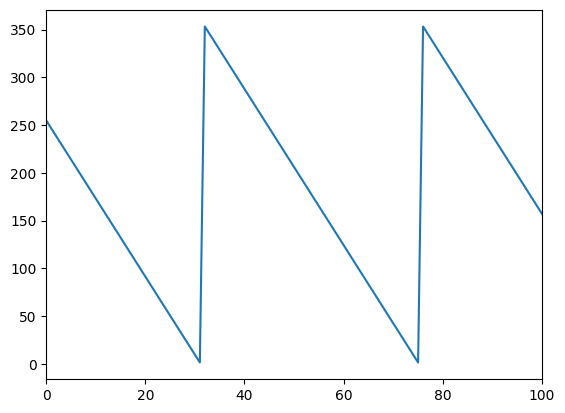

In [4]:
plt.plot((-60 - np.arange(np.pi/4, 5000*np.pi, 24/528 * np.pi)[:] * 180 / np.pi) % 360)
plt.xlim(0, 100)

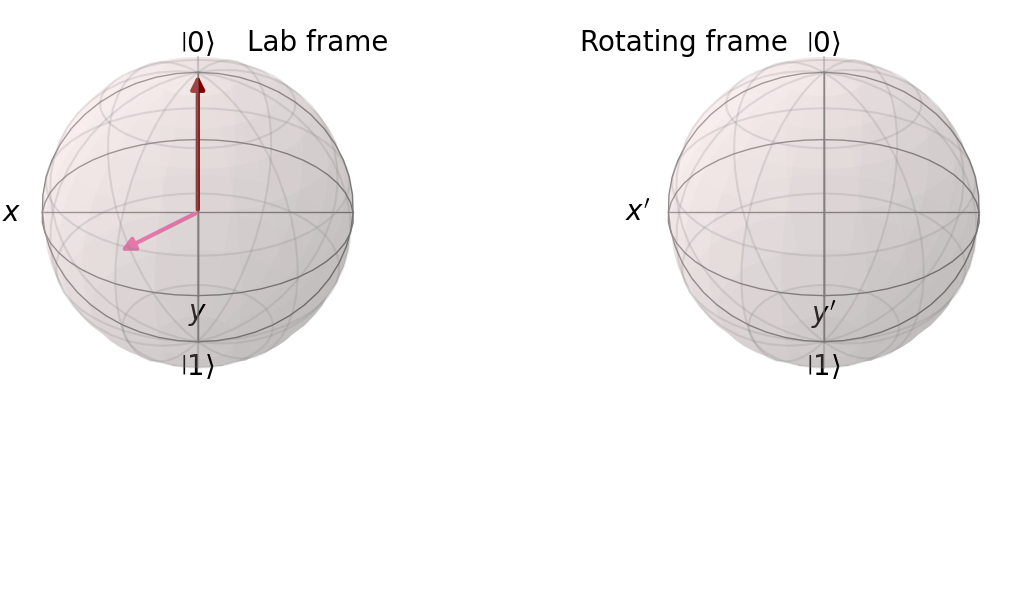

In [5]:
import numpy as np
import qutip
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation as anim
from anim_scripts.Lecture_1.detuning.utils import (
    initialize_ax_dict,
    fade_in_texts,
    fade_out_texts,
    fade_in_axes,
    fade_out_axes,
    interpolate_between,
    calculate_labframe_B_fields,
    calculate_rotating_frame_B_fields,
    update_bloch_sphere_vectors,
    calculate_bloch_vectors,
    # calculate_bloch_vectors_rot,
)
from anim_base import (
    cache_then_save_funcanimation,
    prepare_bloch_mosaic,
    bloch_vector,
    PrettyAxis,
    file_type
)

##########################
# LONGER DURATIONS FOR ACTUAL ANIMATION
##########################
N_time = 750
t_0 = 20 # Lab bloch sphere is fully on the screen
t_1 = 70 # Total Hamiltonian arrow and first row text start fading in
t_2 = 90 # Total Hamiltonian arrow and first row text stop fading in
t_3 = 160 # Second row equations starts fading in
t_4 = 180 # Second row equations stop fading in
t_5 = 220 # Rotating frame arrow and text start fading in
t_6 = 240 # Rotating frame arrow an text stop fading in
t_7 = 280 # Rotating frame total Hamiltonian equation first row and bloch sphere start fading in
t_8 = 300 # Rotating frame total Hamiltonian equation first row and bloch sphere stop fading in, bloch vectors start evolving
t_9 = 340 # Second and third row equation rotating frame start fading in
t_10 = 360 # Second and third row equation rotating frame stop fading in
t_11 = 380 # Bloch vectors arrive at their final position
t_12 = 440 # Lab bloch sphere, equations and arrow start fading out
t_13 = 470 # Lab bloch sphere, equations and arrow stop fading out, rotating frame bloch sphere starts moving (and stops rotating)
t_14 = 520 # Rotating frame bloch sphere stops moving, pretty axes start fading, spin vector in bloch sphere starts appearing
t_15 = 550 # Pretty axes stop fading, spin vector in bloch sphere starts rotating and plots start getting drawn
t_16 = 690 # Spin vector in bloch sphere stops rotating and plots stop getting drawn, spin statistics start fading out
t_17 = 720 # Spin statistics stop fading out, lab bloch sphere starts fading in
t_18 = 740 # Lab bloch sphere stops fading in
N_time = 950
time_list = (t_0, t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9, t_10, t_11, t_12, t_13, t_14, t_15, t_16, t_17, t_18)

##########################
# SHORTER DURATIONS FOR DEBUGGING
##########################
DEBUG = False
show_time_list = False
if DEBUG:
    N_time //= 10
    time_list = [t // 10 for t in time_list]
    t_0, t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9, t_10, t_11, t_12, t_13, t_14, t_15, t_16, t_17, t_18 = time_list


bloch_mosaic = [["bloch_lab", "plot_between", "bloch_rot"],
                ["plot", "plot", "plot"]]

settings = {
    "B_x_max": 0.7,
    "B_zeeman_lab_z": 1,
    "phi_0": np.pi/4,
    "phi_end_lab": 240*np.pi,
    "phi_end_rot": 5000*np.pi,
    "arrow_length": 0.2,
    "time_list": time_list,
    "vector_colors": ["maroon", "hotpink", "red"],
    "intial_sphere_alpha": 0.2,
    "initial_frame_alpha": 0.2,
    "intial_font_alpha": 1,
    "vector_rotation_speed_rad": 24/528 * np.pi,
    "rabi_frequency": 5/100 * np.pi,
    "detuning": - 10/528 * np.pi,
    "spin_vector_color": "blue",
    "tail_length": 20,
    "detuning_plot_size":  - 0.3,
    "initial_bloch_vector": "0",
    "counter_rotating_vector_color": "deepskyblue",
}

bloch_kwargs = [{
    "vector_color": settings['vector_colors'],
    "vector_alpha" : [1,1,0],
    "vector_width": 3,
    },
    {
    "vector_color": settings['vector_colors'][:],
    "vector_width": 3,
    "xlabel": [r"$x^\prime$", ''],
    "ylabel": [r"$y^\prime$", '']
    }
]

gridspec_kw = {"height_ratios":[1,0.4], "width_ratios":[1, 0.5, 1]}
fig, ax_dict, sphere_dict = prepare_bloch_mosaic(bloch_mosaic, (10,6), bloch_kwargs, gridspec_kw=gridspec_kw)

ax_dict["plot"].set_axis_off()
ax_dict["plot_between"].set_axis_off()

phi = np.arange(settings["phi_0"], settings['phi_end_lab'], settings['vector_rotation_speed_rad'])
phi_rot = np.arange(settings["phi_0"], settings['phi_end_rot'], settings['vector_rotation_speed_rad'])
azim_angle_rot_sphere = (-60 - phi_rot[:] * 180 / np.pi) % 360
B_drive_lab, B_zeeman_lab, B_total_lab = calculate_labframe_B_fields(phi, settings)
B_drive_rot, B_zeeman_rot, B_total_rot = calculate_rotating_frame_B_fields(phi_rot, settings)

sphere_dict["bloch_lab"].add_vectors([B_zeeman_lab[0], B_drive_lab[0]])

omega_0 = settings['vector_rotation_speed_rad']
omega_d = omega_0 + settings['detuning']
if settings['initial_bloch_vector'] == "0":
    psi_0 = qutip.basis(2, 0)
elif settings['initial_bloch_vector'] == "1":
    psi_0 = qutip.basis(2, 1)
elif settings['initial_bloch_vector'] == "+":
    psi_0 = (qutip.basis(2, 0) + qutip.basis(2, 1)).unit()
elif settings['initial_bloch_vector'] == "-":
    psi_0 = (qutip.basis(2, 0) - qutip.basis(2, 1)).unit()
else:
    psi_0 = qutip.basis(2, 0)

# precessing_bloch_vector_lab, precessing_bloch_vector_rot = calculate_bloch_vectors(
#     omega_d, omega_0, settings['rabi_frequency'], np.arange(N_time), psi_0
# )
# for idx in range(len(precessing_bloch_vector_lab)):
#     precessing_bloch_vector_lab[idx] /= np.linalg.norm(precessing_bloch_vector_lab[idx])
#     precessing_bloch_vector_rot[idx] /= np.linalg.norm(precessing_bloch_vector_rot[idx])

precessing_bloch_vector_lab, precessing_bloch_vector_rot = calculate_bloch_vectors(
    settings['rabi_frequency'], np.arange(N_time), np.array([1, 0, 0]), B_total_rot[1]/np.linalg.norm(B_total_rot[1]), B_total_lab
)

initial_bloch_vector = precessing_bloch_vector_rot[0]
B_lab_texts, B_rot_texts, transformation_texts = initialize_ax_dict(ax_dict, settings)

B_lab_H_text, B_lab_H_zeeman_text, B_lab_H_drive_text, B_lab_H_zeeman_eq, B_lab_H_drive_eq = B_lab_texts
B_rot_H_text, B_rot_H_zeeman_text, B_rot_H_drive_text, B_rot_H_zeeman_eq, B_rot_H_drive_eq_1, B_rot_H_drive_eq_2 = B_rot_texts
W_trans_equation, W_trans_arrow, omega_is_omega_L = transformation_texts

# Time array
t = np.arange(0, N_time)

# Effective magnetic field in the lab frame
Bx = settings['rabi_frequency'] * np.cos(settings['vector_rotation_speed_rad'] * t)
By = settings['rabi_frequency'] * np.sin(settings['vector_rotation_speed_rad'] * t)
Bz = np.full_like(t, settings['vector_rotation_speed_rad'])   

# Initial Bloch vector (start at north pole of the sphere)
r = np.zeros((len(t), 3))
r[0] = [0, 0, 1]  # [x, y, z]

# Solve Bloch equations using Euler method
for i in range(1, len(t)):
    B = np.array([Bx[i], By[i], Bz[i]])
    drdt = np.cross(B, r[i - 1])
    r[i] = r[i - 1] + drdt
    r[i] /= np.linalg.norm(r[i])

if show_time_list:
    new_ax = fig.add_axes([0.9, 0.9, 0.1, 0.1])
    new_ax.set_axis_off()


sphere_dict["bloch_rot"].make_sphere()
sphere_dict["bloch_lab"].make_sphere()
ax_dict["bloch_lab"].azim = 0
ax_dict["bloch_rot"].azim = 0
frame_text_lab = ax_dict["bloch_lab"].text(0, 0.3, 1.15, "Lab frame", color = "black", size=20, alpha=1, zorder=1000)
frame_text_lab = ax_dict["bloch_rot"].text(0, -1.5, 1.15, "Rotating frame", color = "black", size=20, alpha=1, zorder=1000)

In [6]:
abs_pos_text_rot = np.array([0, -1.5, 1.15])
abs_pos_text_lab = np.array([0, 0.3, 1.15])
azim_angle_lab = ax_dict["bloch_lab"].azim
rot_matrix_lab = np.array([
    [np.cos(azim_angle_lab), np.sin(azim_angle_lab), 0],
    [-np.sin(azim_angle_lab), np.cos(azim_angle_lab), 0],
    [0, 0, 1]
])
pos_text_lab = np.dot(rot_matrix_lab, abs_pos_text_lab)


def animate(i):
    if i in time_list and show_time_list:
        index_in_time_list = list(time_list).index(i)
        new_ax.cla()
        new_ax.text(0, 0.5, f"t_{index_in_time_list:.0f}: t = {i}", fontsize=20, ha='center', va='center')
    if i <= t_0:
        new_alpha_sphere = interpolate_between(i, 0, t_0, 0, settings['initial_frame_alpha'])
        new_alpha_font = interpolate_between(i, 0, t_0, 0, settings['intial_font_alpha'])
        new_alpha_vectors = interpolate_between(i, 0, t_0, 0, 1)
        sphere_dict['bloch_lab'].sphere_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].frame_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].font_color = (0, 0, 0, new_alpha_font)
        sphere_dict['bloch_lab'].frame_width = new_alpha_vectors
        sphere_dict["bloch_lab"].vector_alpha = [new_alpha_vectors, new_alpha_vectors]
        sphere_dict['bloch_lab'].make_sphere()
    if t_0 < i <= t_12:
        update_bloch_sphere_vectors(
            i, sphere_dict, ax_dict, B_zeeman_lab, B_drive_lab, B_total_lab, B_drive_rot, B_zeeman_rot, B_total_rot, azim_angle_rot_sphere, settings
        )
    if t_1 < i <= t_2:
        fade_in_texts(i, t_1, t_2, [B_lab_H_text, B_lab_H_zeeman_text, B_lab_H_drive_text])
    if t_3 < i <= t_4:
        fade_in_texts(i, t_3, t_4, [B_lab_H_zeeman_eq, B_lab_H_drive_eq])
    if t_5 < i <= t_6:
        fade_in_texts(i, t_5, t_6, [W_trans_arrow, W_trans_equation, omega_is_omega_L])
    if t_7 < i <= t_8:
        fade_in_texts(i, t_7, t_8, [B_rot_H_text, B_rot_H_zeeman_text, B_rot_H_drive_text])
    if t_9 < i <= t_10:
        if settings['detuning'] == 0:
            fade_in_texts(i, t_9, t_10, [B_rot_H_zeeman_eq, B_rot_H_drive_eq_1, B_rot_H_drive_eq_2])
        else:
            fade_in_texts(i, t_9, t_10, [B_rot_H_zeeman_eq, B_rot_H_drive_eq_1])
    if t_12 < i <= t_13:
        new_alpha_sphere = max(0, (t_13 - i) / (t_13 - t_12) * settings['initial_frame_alpha'])
        new_alpha_font = max(0, (t_13 - i) / (t_13 - t_12) * settings['intial_font_alpha'])

        sphere_dict['bloch_lab'].sphere_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].frame_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].font_color = (0, 0, 0, new_alpha_font)
        sphere_dict['bloch_lab'].frame_width *= (t_13 - i)/(t_13-t_12)
        sphere_dict["bloch_lab"].vector_alpha = [new_alpha_sphere, new_alpha_sphere, new_alpha_sphere]
        sphere_dict['bloch_lab'].make_sphere()

        if settings['detuning'] == 0:
            all_texts_to_fade = (
                [B_lab_H_text, B_lab_H_zeeman_text, B_lab_H_drive_text] +
                [B_lab_H_zeeman_eq, B_lab_H_drive_eq] +
                [W_trans_arrow, W_trans_equation, omega_is_omega_L] +
                [B_rot_H_text, B_rot_H_zeeman_text, B_rot_H_drive_text] +
                [B_rot_H_zeeman_eq, B_rot_H_drive_eq_1, B_rot_H_drive_eq_2]
            )
        else:
            all_texts_to_fade = (
                [B_lab_H_text, B_lab_H_zeeman_text, B_lab_H_drive_text] +
                [B_lab_H_zeeman_eq, B_lab_H_drive_eq] +
                [W_trans_arrow, W_trans_equation, omega_is_omega_L] +
                [B_rot_H_text, B_rot_H_zeeman_text, B_rot_H_drive_text] +
                [B_rot_H_zeeman_eq, B_rot_H_drive_eq_1]
            )
        fade_out_texts(i, t_12, t_13, all_texts_to_fade)
        if i == t_13:
            global lab_sphere_position
            lab_sphere_position = ax_dict['bloch_lab'].get_position()

    if t_13 < i <= t_14:
        current_position = ax_dict['bloch_rot'].get_position()
        new_height = interpolate_between(i, t_13, t_14, current_position.height, 0.8)
        new_width = interpolate_between(i, t_13, t_14, current_position.width, 0.5)
        new_y_pos = interpolate_between(i, t_13, t_14, current_position.y0, 0.1)
        new_x_pos = interpolate_between(i, t_13, t_14, current_position.x0, lab_sphere_position.x0)
        next_position = [new_x_pos, new_y_pos, new_width, new_height]
        ax_dict['bloch_rot'].set_position(next_position)

    if t_14 < i <= t_15:
        if i == t_14 + 1:
            ax_dict['spin_statistics'] = fig.add_axes((0.6, 0.2, 0.4, 0.6))
            ax_dict['spin_statistics'].set_axis_off()
            global pretty_axis_spin_statistics
            global pretty_axis_x_spin
            global pretty_axis_y_spin

            pretty_axis_spin_statistics = PrettyAxis(ax_dict['spin_statistics'], (0, 5, 4.5), (1, 8, 0), (0, 1), (-1.05, 1.05), alpha=1)
            pretty_axis_spin_statistics.add_line("spin_z", 1, 1, c='blue', alpha=1)
            pretty_axis_spin_statistics.add_label(r"$\langle S_{z'} \rangle$", "y", size=20)
            pretty_axis_spin_statistics.add_label(r"$t$", "x", size=20)

            pretty_axis_x_spin = PrettyAxis(ax_dict['spin_statistics'], (0, 2.25, -3.5), (-6, -1, 0), (0, 1), (-1.05, 1.05), alpha=1)
            pretty_axis_x_spin.add_line("spin_x", 0, 1, c='blue', alpha=1)
            pretty_axis_x_spin.add_label(r"$\langle S_{x'} \rangle$", "y", size=20)
            pretty_axis_x_spin.add_label(r"$t$", "x", size=20)

            pretty_axis_y_spin = PrettyAxis(ax_dict['spin_statistics'], (2.75, 5, -3.5), (-6, -1, 2.75), (0, 1), (-1.05, 1.05), alpha=1)
            pretty_axis_y_spin.add_line("spin_y", 0, 1, c='blue', alpha=1)
            pretty_axis_y_spin.add_label(r"$\langle S_{y'} \rangle$", "y", size=20)
            pretty_axis_y_spin.add_label(r"$t$", "x", size=20)

        fade_in_axes(i, t_14, t_15, [pretty_axis_spin_statistics, pretty_axis_x_spin, pretty_axis_y_spin])
        sphere_dict['bloch_rot'].vectors = []
        sphere_dict['bloch_rot'].add_vectors([initial_bloch_vector, B_total_rot[i - t_14 + 1]])
        sphere_dict['bloch_rot'].vector_alpha = [(i-t_14)/(t_15-t_14), 1, i-t_14/(t_15-t_14)]
        sphere_dict['bloch_rot'].vector_color = [settings['spin_vector_color'], 'red', "purple"]
        sphere_dict['bloch_rot'].make_sphere()

    if t_15 < i <= t_16:
        all_spinx_vals = [
            vector[0] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        all_spiny_vals = [
            vector[1] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        all_spinz_vals = [
            vector[2] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        tail_length = min(settings['tail_length'], len(all_spinz_vals))
        tail_points = precessing_bloch_vector_rot[i-t_15-tail_length+1:i-t_15+2]
        sphere_dict['bloch_rot'].vectors = []
        sphere_dict['bloch_rot'].vector_alpha = [1, 1, 1]
        sphere_dict['bloch_rot'].vector_color = [settings['spin_vector_color'], 'red', "purple"]
        sphere_dict['bloch_rot'].add_vectors([precessing_bloch_vector_rot[i-t_15+1], B_total_rot[i - t_15 + 1]])
        sphere_dict['bloch_rot'].points = []
        sphere_dict['bloch_rot'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l") if not DEBUG else None
        sphere_dict['bloch_rot'].make_sphere()
        pretty_axis_spin_statistics.update_line('spin_z', np.arange(len(all_spinz_vals))/(t_17-t_15), np.array(all_spinz_vals))
        pretty_axis_x_spin.update_line('spin_x', np.arange(len(all_spinx_vals))/(t_17-t_15), np.array(all_spinx_vals))
        pretty_axis_y_spin.update_line('spin_y', np.arange(len(all_spiny_vals))/(t_17-t_15), np.array(all_spiny_vals))

    if t_16 < i <= t_17:
        all_spinx_vals = [
            vector[0] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        all_spiny_vals = [
            vector[1] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        all_spinz_vals = [
            vector[2] for vector in precessing_bloch_vector_rot[:i - t_15 + 1]
        ]
        tail_points = precessing_bloch_vector_rot[i-t_15-settings['tail_length']+1:i-t_15+2]
        sphere_dict['bloch_rot'].vectors = []
        sphere_dict['bloch_rot'].add_vectors([precessing_bloch_vector_rot[i-t_15+1], B_total_rot[i - t_15 + 1]])
        sphere_dict['bloch_rot'].points = []
        sphere_dict['bloch_rot'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l") if not DEBUG else None
        sphere_dict['bloch_rot'].make_sphere()
        pretty_axis_spin_statistics.update_line('spin_z', np.arange(len(all_spinz_vals))/(t_17-t_15), np.array(all_spinz_vals))
        pretty_axis_x_spin.update_line('spin_x', np.arange(len(all_spinx_vals))/(t_17-t_15), np.array(all_spinx_vals))
        pretty_axis_y_spin.update_line('spin_y', np.arange(len(all_spiny_vals))/(t_17-t_15), np.array(all_spiny_vals))
        for axis in [pretty_axis_spin_statistics, pretty_axis_x_spin, pretty_axis_y_spin]:
            axis.alpha = 1 - (i-t_16)/(t_17-t_16)

        if i == t_17:
            ax_dict["bloch_lab"].set_position([
                ax_dict["bloch_rot"].get_position().x0+0.5,
                ax_dict["bloch_rot"].get_position().y0,
                ax_dict["bloch_rot"].get_position().width,
                ax_dict["bloch_rot"].get_position().height
            ])
            fig.delaxes(ax_dict['spin_statistics'])

    if t_17 < i <= t_18:
        tail_points = r[max(0, i-t_17-settings['tail_length']+1):i-t_17+1]
        new_alpha_sphere = interpolate_between(i, t_17, t_18, 0, settings['initial_frame_alpha'])
        new_alpha_font = interpolate_between(i, t_17, t_18, 0, settings['intial_font_alpha'])
        new_alpha_vectors = interpolate_between(i, t_17, t_18, 0, 1)
        sphere_dict['bloch_lab'].sphere_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].frame_alpha = new_alpha_sphere
        sphere_dict['bloch_lab'].font_color = (0, 0, 0, new_alpha_font)
        sphere_dict["bloch_lab"].vectors = [B_total_lab[i - t_17 + 1] / np.linalg.norm(B_total_lab[i - t_17 + 1]), r[i - t_17 + 1]]
        sphere_dict["bloch_lab"].vector_alpha = [new_alpha_vectors, new_alpha_vectors]
        sphere_dict['bloch_lab'].frame_width = new_alpha_vectors
        sphere_dict["bloch_lab"].vector_color = [settings['vector_colors'][2], "blue"]
        sphere_dict['bloch_lab'].points = []
        sphere_dict['bloch_lab'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l", alpha=1) if not DEBUG else None
        sphere_dict['bloch_lab'].make_sphere()

        tail_points = precessing_bloch_vector_rot[i-t_15-settings['tail_length']+1:i-t_15+2]
        sphere_dict['bloch_rot'].vectors = []
        sphere_dict['bloch_rot'].add_vectors([precessing_bloch_vector_rot[i-t_15+1], B_total_rot[i - t_15 + 1]])
        sphere_dict['bloch_rot'].points = []
        sphere_dict['bloch_rot'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l") if not DEBUG else None
        sphere_dict['bloch_rot'].make_sphere()

    if i > t_18:
        tail_points = r[max(0, i-t_17-settings['tail_length']+1) : i-t_17+1]
        sphere_dict["bloch_lab"].vectors = [B_total_lab[i - t_17 + 1] / np.linalg.norm(B_total_lab[i - t_17 + 1]), r[i - t_17 + 1]]
        sphere_dict["bloch_lab"].vector_color = [settings['vector_colors'][2], "blue", "purple"]
        sphere_dict['bloch_lab'].points = []
        sphere_dict['bloch_lab'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l") if not DEBUG else None #, colors=['blue']*tail_length)
        sphere_dict["bloch_lab"].vector_alpha = [1, 1, 1]
        sphere_dict["bloch_lab"].make_sphere()

        tail_points = precessing_bloch_vector_rot[i-t_15-settings['tail_length']+1:i-t_15+2]
        sphere_dict['bloch_rot'].vectors = []
        sphere_dict['bloch_rot'].add_vectors([precessing_bloch_vector_rot[i-t_15+1], B_total_rot[i - t_15 + 1]])
        sphere_dict['bloch_rot'].points = []
        sphere_dict['bloch_rot'].add_points([tail_points[:,0], tail_points[:,1], tail_points[:,2]], meth="l") if not DEBUG else None
        sphere_dict['bloch_rot'].make_sphere()

    if t_0 < i < t_13:
        text_lab = ax_dict["bloch_lab"].text(pos_text_lab[0], pos_text_lab[1], pos_text_lab[2], "Lab frame", color = "black", size=20, alpha=1, zorder=1000)
        if i > t_8:
            angle_rot = ax_dict["bloch_rot"].azim * np.pi / 180
            rot_matrix_rot = np.array([
                [np.cos(angle_rot), -np.sin(angle_rot), 0],
                [np.sin(angle_rot), np.cos(angle_rot), 0],
                [0, 0, 1]
            ])
            pos_text_rot = np.dot(rot_matrix_rot, abs_pos_text_rot)
            if i <= t_9:
                alpha = interpolate_between(i, t_8, t_9, 0, 1)
            else:
                alpha = 1
            text_rot = ax_dict["bloch_rot"].text(pos_text_rot[0], pos_text_rot[1], pos_text_rot[2], "Rotating frame", color = "black", size=20, alpha=alpha, zorder=1000)

    return list(ax_dict.values())

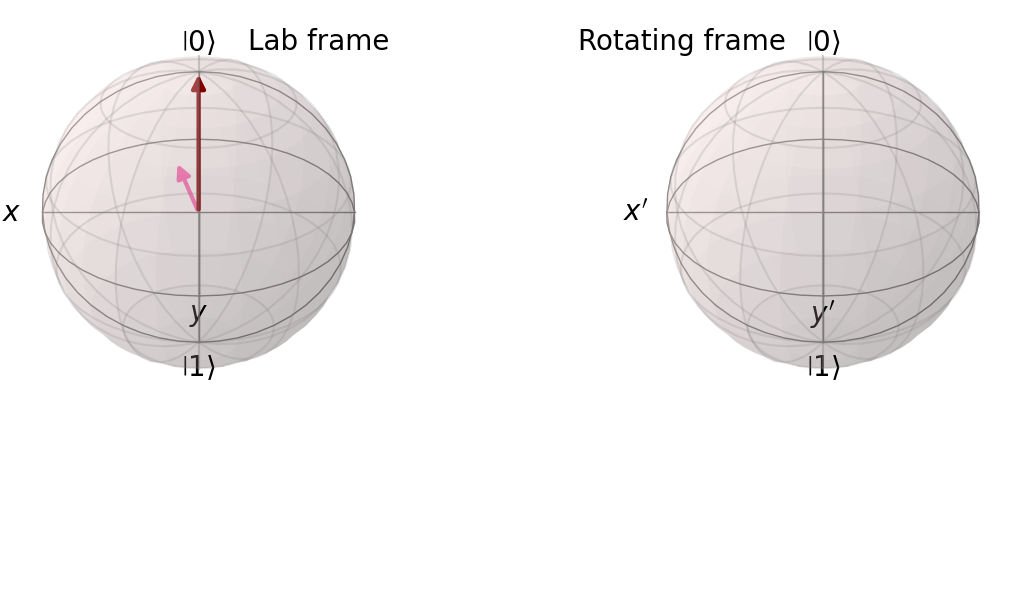

In [9]:
animate(50)
fig

In [14]:
print(sphere_dict['bloch_lab'])

Bloch data:
-----------
Number of points:  0
Number of vectors: 0

Bloch sphere properties:
------------------------
font_color:      black
font_size:       20
frame_alpha:     0.2
frame_color:     gray
frame_width:     1
point_default_color:['b', 'r', 'g', '#CC6600']
point_marker:    ['o', 's', 'd', '^']
point_size:      [25, 32, 35, 45]
sphere_alpha:    0.2
sphere_color:    #FFDDDD
figsize:         [5, 5]
vector_default_color:['g', '#CC6600', 'b', 'r']
vector_width:    6
vector_style:    -|>
vector_mutation: 20
view:            [-60, 30]
xlabel:          ['$x$', '']
xlpos:           [1.2, -1.2]
ylabel:          ['$y$', '']
ylpos:           [1.2, -1.2]
zlabel:          ['$\\left|0\\right>$', '$\\left|1\\right>$']
zlpos:           [1.2, -1.2]



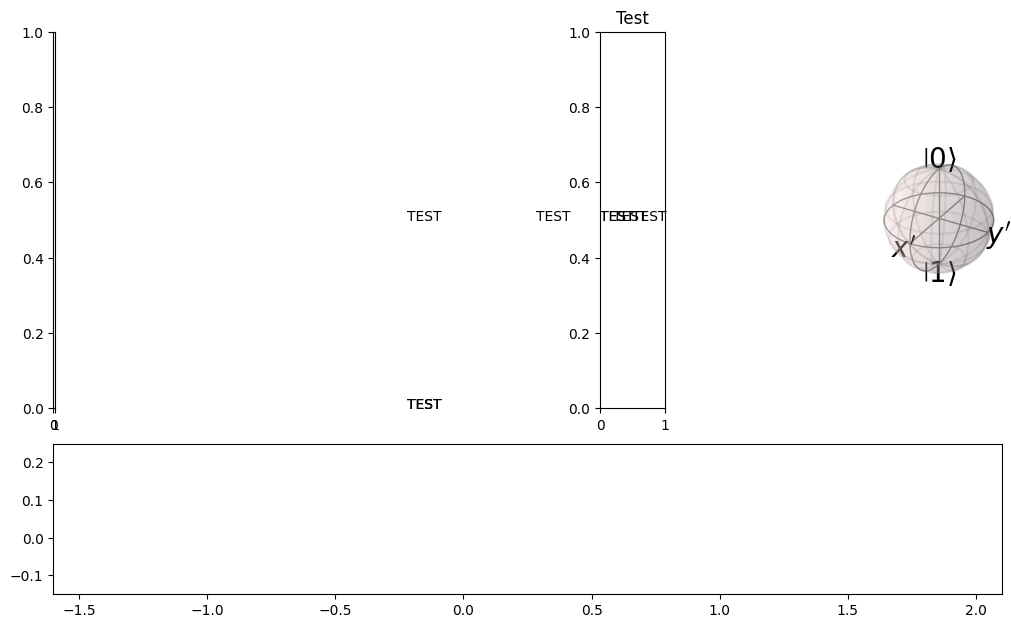

In [ ]:
ax_dict['bloch_rot'].set_title("Test")
ax_dict['plot_between'].text(-3, 0, "TEST")
# ax_dict['plot_between'].set_title("Test")
sphere_dict['bloch_rot'].make_sphere()

fig

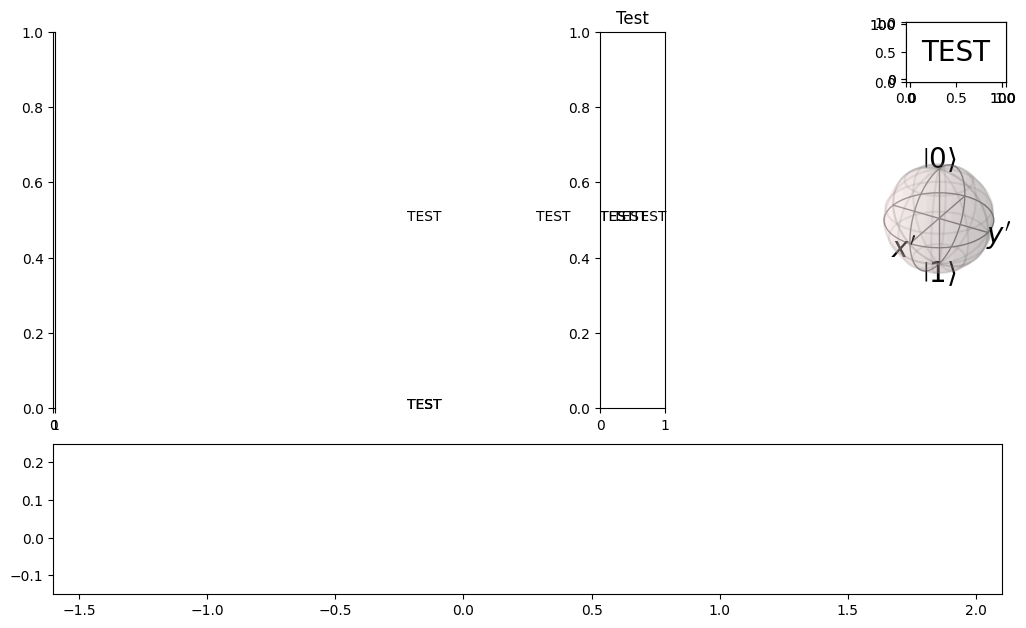

In [22]:
new_ax = fig.add_axes([0.9, 0.9, 0.1, 0.1])
new_ax.set_axis_off()
new_ax.text(0.5, 0.5, "TEST", fontsize=20, ha='center', va='center')

fig

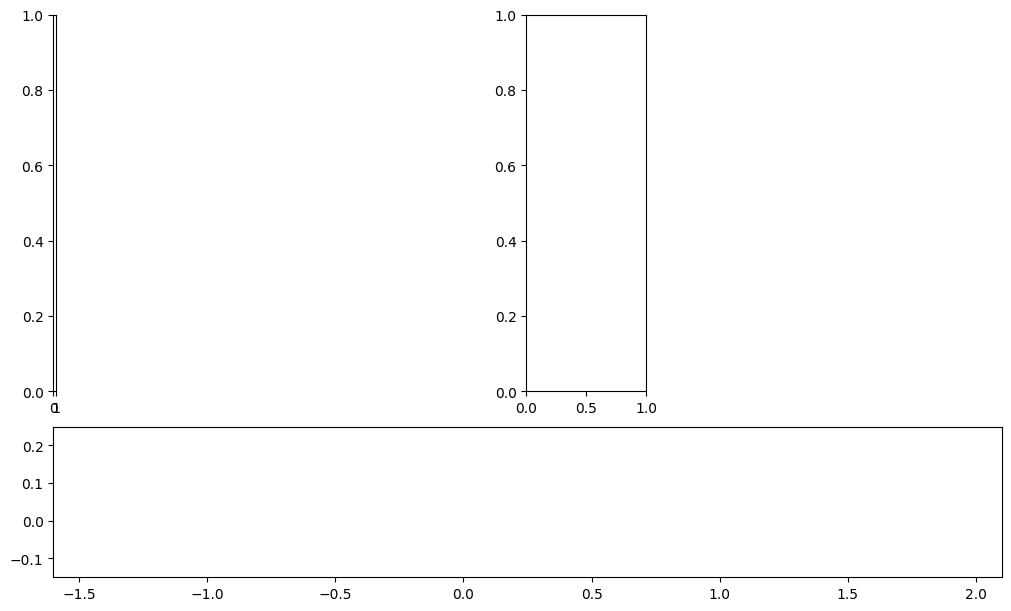

In [4]:
sphere_dict['bloch_rot'].frame_alpha = 0
sphere_dict['bloch_rot'].sphere_alpha = 0
sphere_dict['bloch_rot'].frame_color = 'white'
sphere_dict['bloch_rot'].frame_width = 0
sphere_dict['bloch_rot'].font_color = "white"
# sphere_dict['bloch_lab'].make_sphere()

sphere_dict['bloch_rot'].make_sphere()

# ax_dict['bloch_lab']
# ax_dict['bloch_lab'].plot([0,0], [0,0], [0,1], color='black', linestyle='--', alpha=0.5)
# ax_dict['bloch_lab'].set_position([0.01, 0.01, 0.01, 0.01])
# ax_dict['spin_plots'].set_position([0.01, 0.85, 0.3, 0.4])
# ax_dict['spin_plots'].plot([0,0], [0,0], [0,1], color='black', linestyle='--', alpha=0.5)
fig

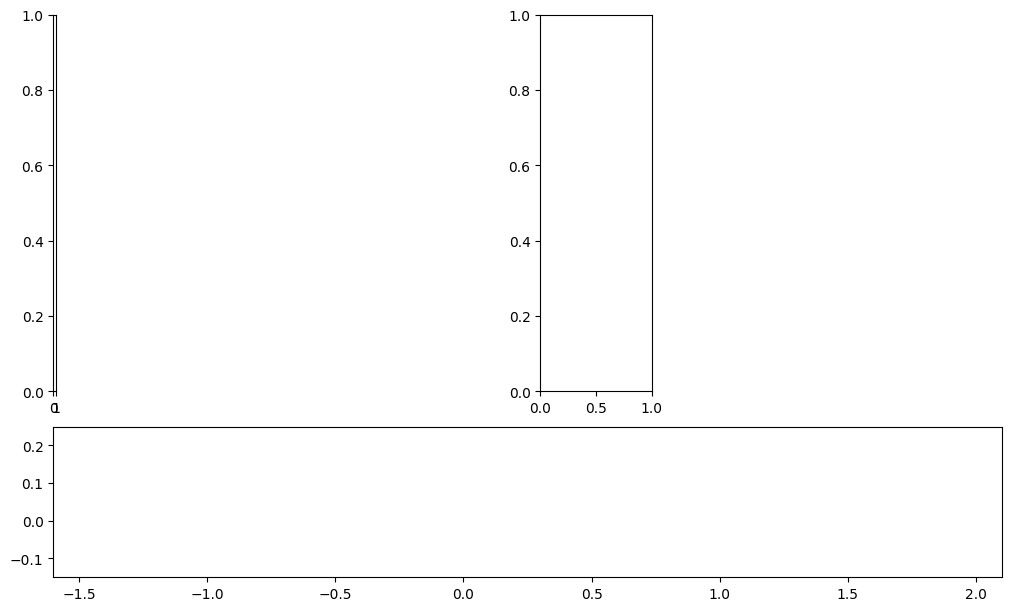

In [5]:
ax_dict['bloch_rot'].get_position()
new_pos = ax_dict['bloch_rot'].get_position()
new_pos = [
    new_pos.x0,
    new_pos.y0,
    new_pos.width,
    new_pos.height
]
ax_dict['bloch_rot'].set_position(new_pos)
ax_dict['bloch_rot'].sphere_alpha = 0.4
ax_dict['bloch_rot'].frame_alpha = 0.4
ax_dict['bloch_rot'].frame_color = (1,1,1,0.4)
# ax_dict['bloch_rot'].get_position()
fig

In [6]:
ax_dict['bloch_rot']

<Axes3D: >

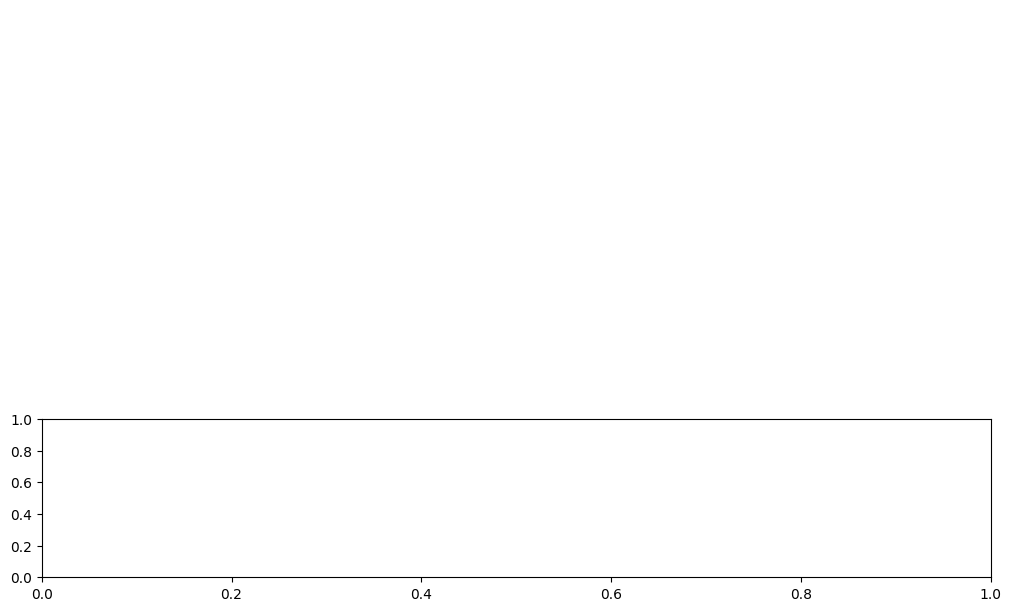

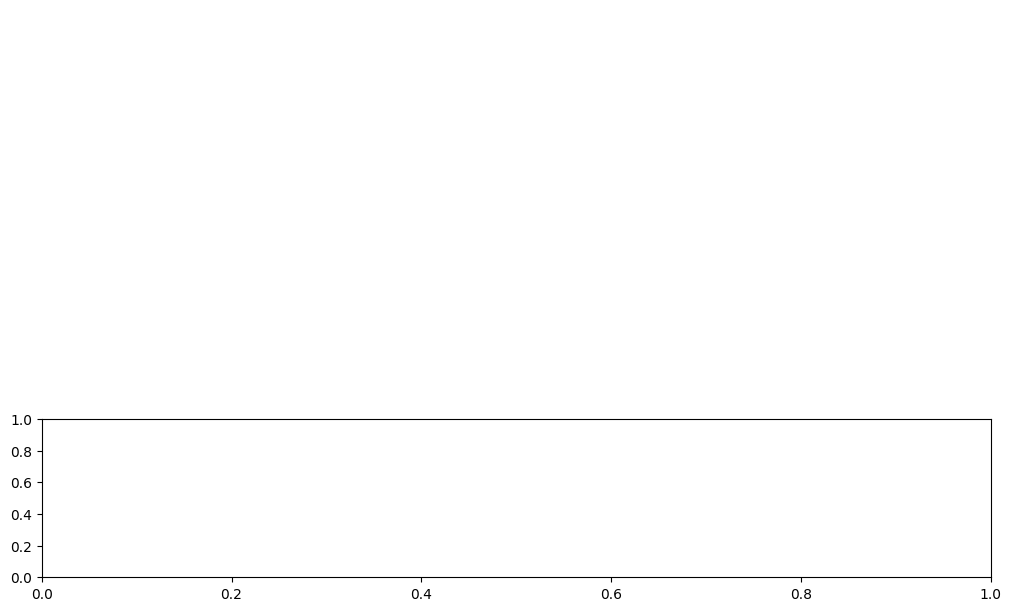

In [14]:
bloch_mosaic = [["bloch_lab", "bloch_rot"],
                ["plot", "plot"]]
bloch_kwargs = [{
    "vector_color": settings['vector_colors'],
    "vector_alpha" : [1,1,0],
    "vector_width": 6,
    },
    {
    "vector_color": settings['vector_colors'][:],
    "vector_width": 6,
    "xlabel": [r"$x^\prime$", ''],
    "ylabel": [r"$y^\prime$", '']
    }
]

gridspec_kw = {"height_ratios":[1, 0.4], "width_ratios":[1, 1]}
fig, ax_dict, sphere_dict = prepare_bloch_mosaic(bloch_mosaic, (10,6), bloch_kwargs, gridspec_kw=gridspec_kw)
fig

In [8]:
sphere_dict['bloch_rot'].

SyntaxError: invalid syntax (4284729234.py, line 1)

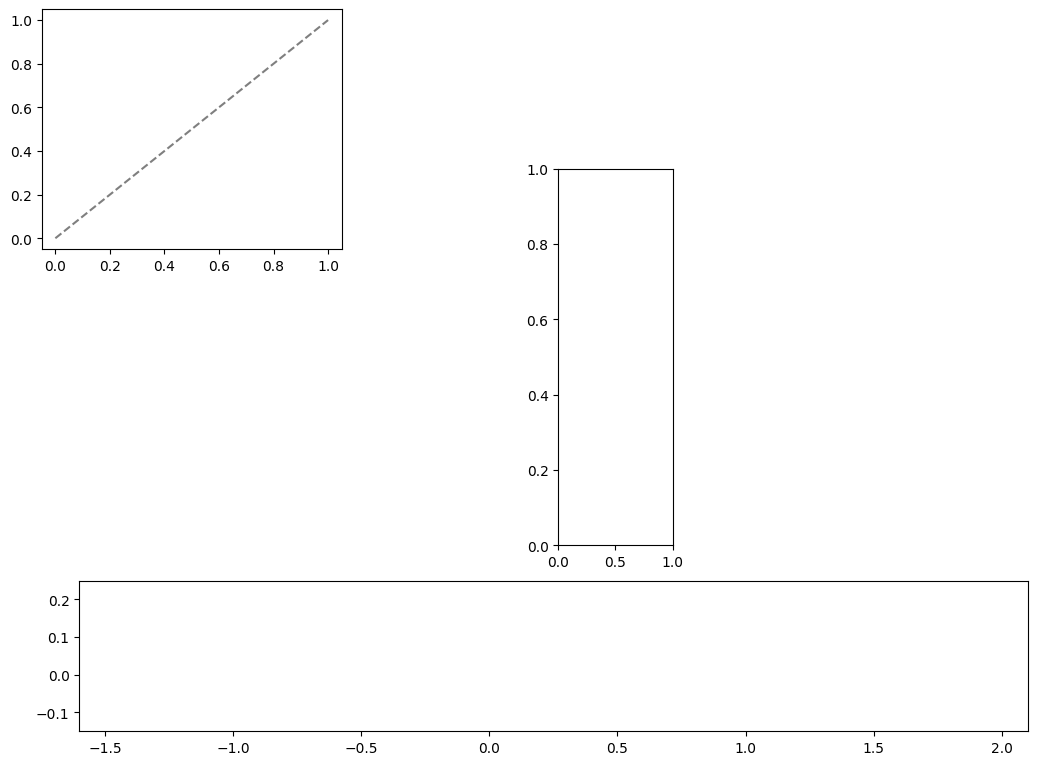

In [ ]:
fig.delaxes(ax_dict['bloch_rot'])  # Remove the axes
fig

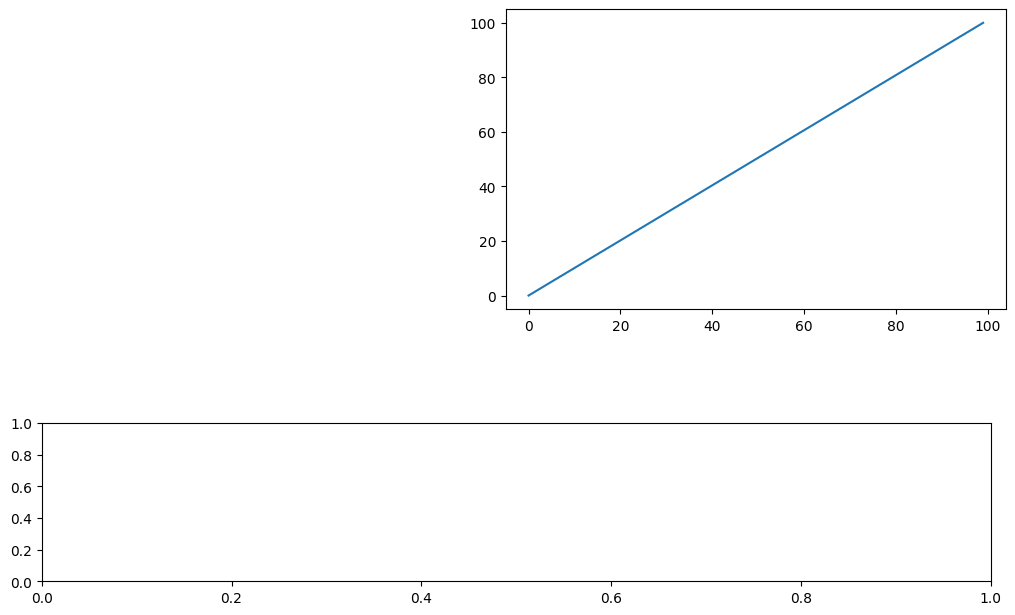

In [15]:
new_axis = fig.add_axes((0.5, 0.5, 0.5, 0.5))
new_axis.plot(np.linspace(0, 100, 100))

fig

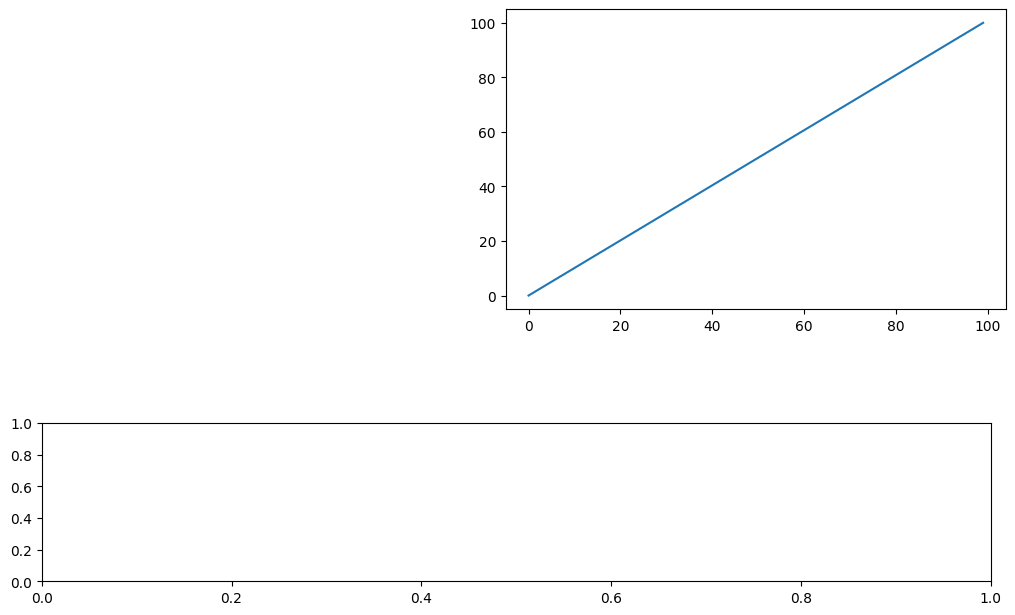

In [19]:
current_pos = new_axis.get_position()
fig

In [23]:
current_pos.width

np.float64(0.5)

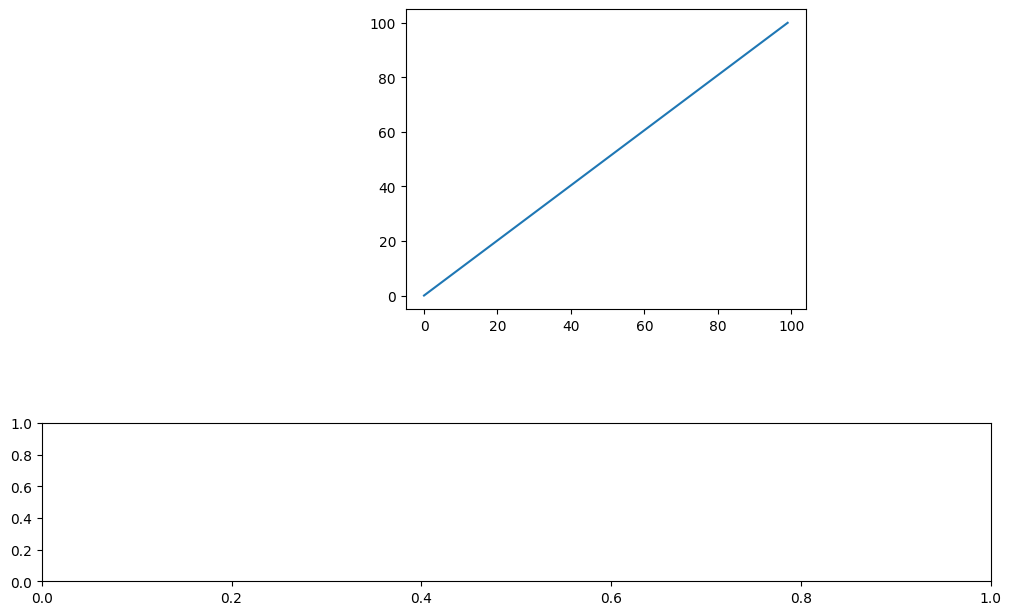

In [22]:
new_axis.set_position(
    [
        current_pos.x0 - 0.1,
        current_pos.y0,
        current_pos.width - 0.1,
        current_pos.height
    ]
)
fig

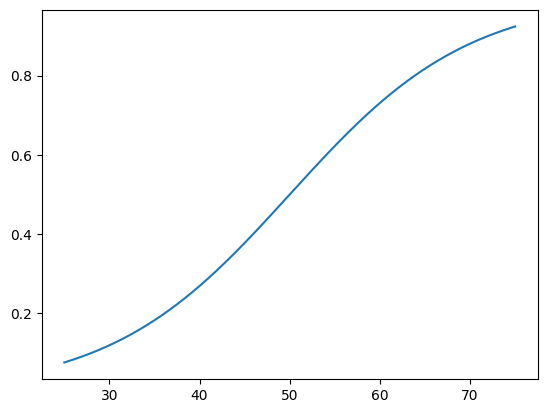

In [17]:
def sigmoid_between(x, x_start, x_end, y_start, y_end):
    return y_start + (y_end - y_start) / (1 + np.exp(-0.1*(x - (x_start + x_end)/2)))

x_plot = np.linspace(25, 75, 1000)
y = sigmoid_between(x_plot, 25, 75, 0, 1)
plt.plot(x_plot, y)


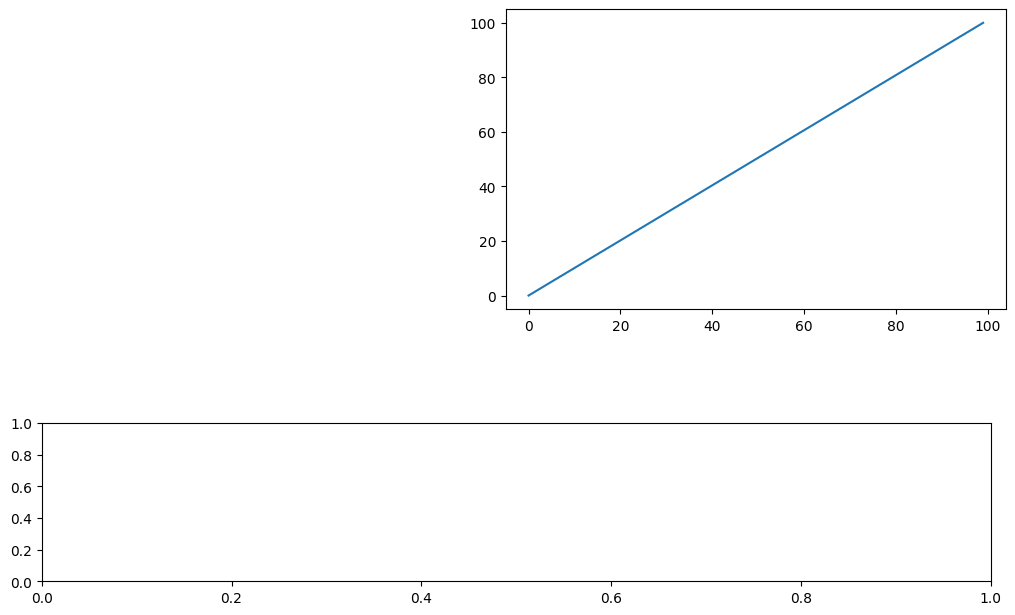

In [16]:
new_axis.set_alpha(0)
fig

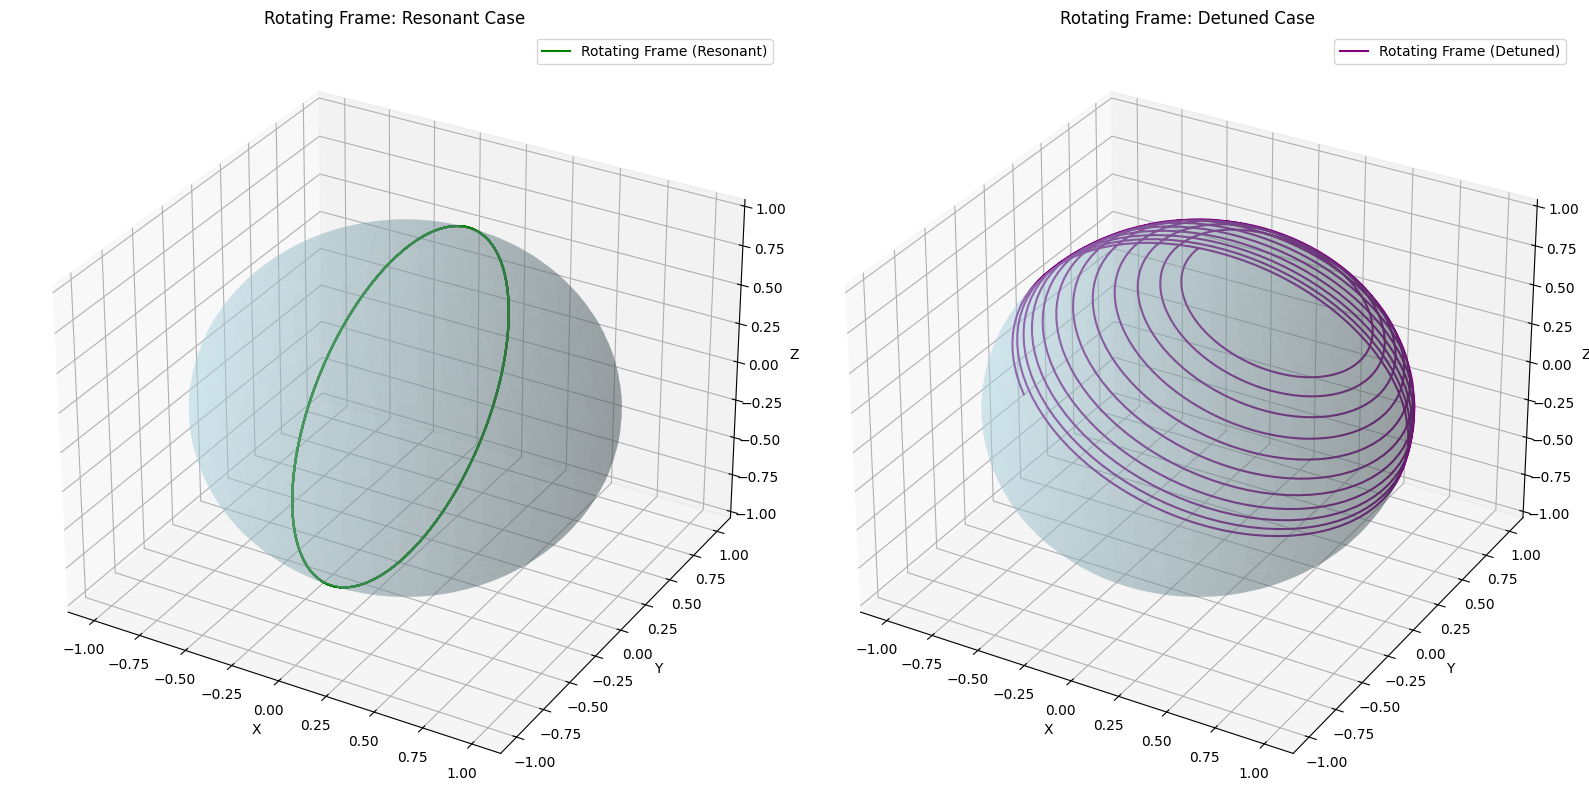

In [1]:
# Re-importing libraries and redefining parameters due to state reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
omega_0 = 2 * np.pi * 1  # Static field frequency (Hz)
Omega = 2 * np.pi * 0.5  # Rabi frequency (Hz)
t_max = 10               # Simulation time (s)
dt = 0.01                # Time step (s)
t = np.arange(0, t_max, dt)

# Resonant case setup
omega_d_resonant = omega_0  # Resonant driving frequency

# Significant negative detuning setup
delta = -2 * np.pi * 1.0  # Detuning (Hz)
omega_d_detuned = omega_0 + delta  # Detuned driving frequency

# Effective magnetic field (lab frame)
def compute_lab_frame(Bz, omega_d):
    Bx = Omega * np.cos(omega_d * t)
    By = Omega * np.sin(omega_d * t)
    Bz = np.full_like(t, Bz)
    return Bx, By, Bz

# Calculate Bloch vector in lab frame
def solve_bloch_equations(Bx, By, Bz, t):
    r = np.zeros((len(t), 3))
    r[0] = [0, 0, 1]  # Initial Bloch vector [x, y, z]
    for i in range(1, len(t)):
        B = np.array([Bx[i], By[i], Bz[i]])
        drdt = np.cross(B, r[i - 1]) * dt
        r[i] = r[i - 1] + drdt
        r[i] /= np.linalg.norm(r[i])  # Normalize
    return r

# Transform to rotating frame
def calculate_rotating_frame(r_lab, omega_d, t):
    r_rot = np.zeros_like(r_lab)
    for i in range(len(t)):
        rotation_matrix = np.array([
            [np.cos(omega_d * t[i]), np.sin(omega_d * t[i]), 0],
            [-np.sin(omega_d * t[i]), np.cos(omega_d * t[i]), 0],
            [0, 0, 1]
        ])
        r_rot[i] = rotation_matrix @ r_lab[i]
    return r_rot

# Bloch sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

# Solve for resonant case
Bx_res, By_res, Bz_res = compute_lab_frame(omega_0, omega_d_resonant)
r_res_lab = solve_bloch_equations(Bx_res, By_res, Bz_res, t)
r_res_rot = calculate_rotating_frame(r_res_lab, omega_d_resonant, t)

# Solve for detuned case
Bx_det, By_det, Bz_det = compute_lab_frame(omega_0, omega_d_detuned)
r_det_lab = solve_bloch_equations(Bx_det, By_det, Bz_det, t)
r_det_rot = calculate_rotating_frame(r_det_lab, omega_d_detuned, t)

# Extract components
x_res, y_res, z_res = r_res_rot[:, 0], r_res_rot[:, 1], r_res_rot[:, 2]
x_det, y_det, z_det = r_det_rot[:, 0], r_det_rot[:, 1], r_det_rot[:, 2]

# Plot the rotating frame trajectories
fig = plt.figure(figsize=(16, 8))

# Resonant case in rotating frame
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax1.plot(x_res, y_res, z_res, label="Rotating Frame (Resonant)", color='green')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Rotating Frame: Resonant Case')
ax1.legend()

# Detuned case in rotating frame
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax2.plot(x_det, y_det, z_det, label="Rotating Frame (Detuned)", color='purple')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Rotating Frame: Detuned Case')
ax2.legend()

plt.tight_layout()
plt.show()


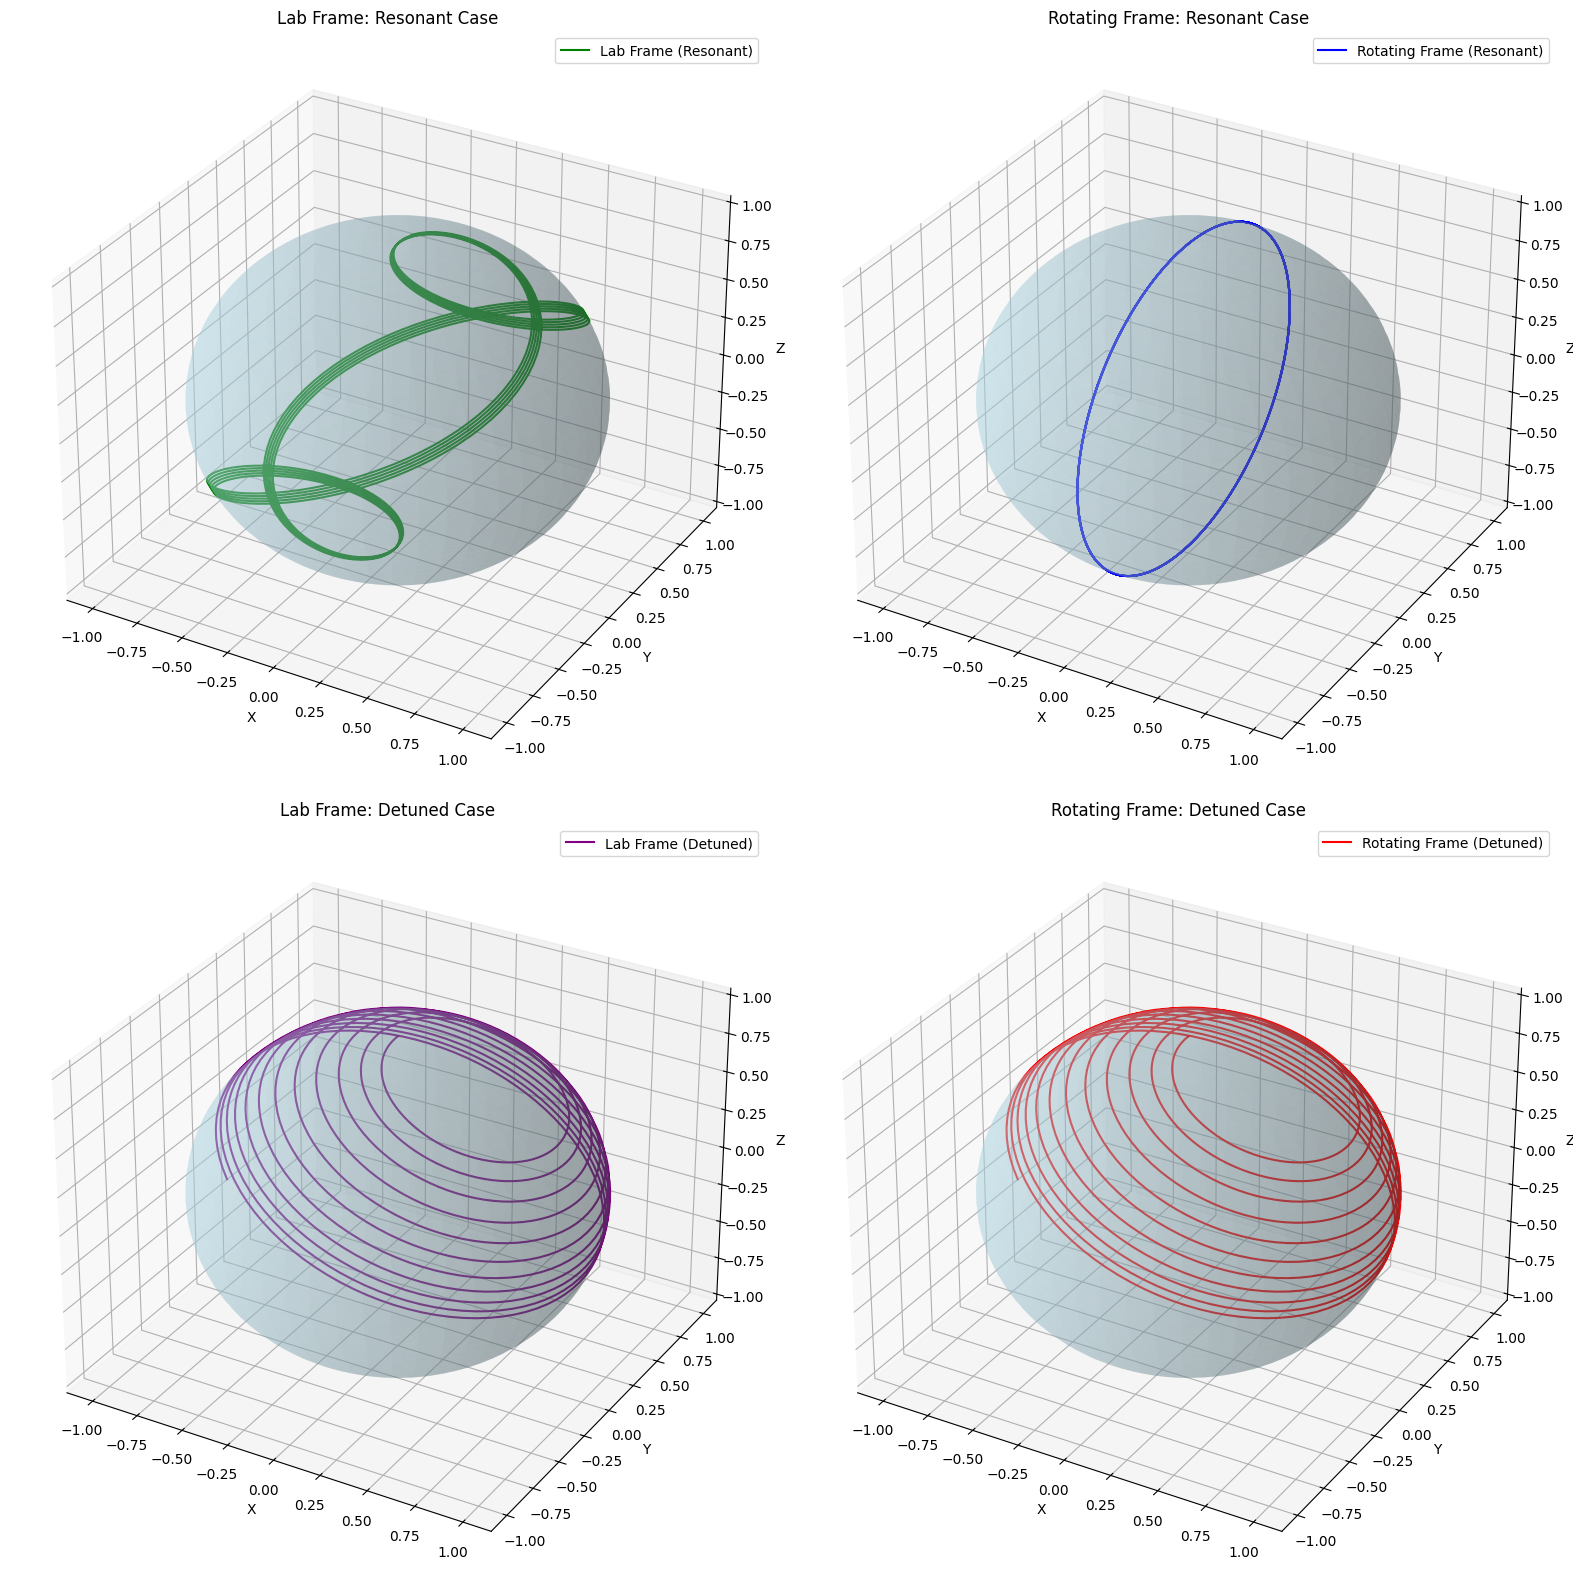

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
omega_0 = 2 * np.pi * 1  # Static field frequency (Hz)
Omega = 2 * np.pi * 0.5  # Rabi frequency (Hz)
t_max = 10               # Simulation time (s)
dt = 0.01                # Time step (s)
t = np.arange(0, t_max, dt)

# Resonant case setup
omega_d_resonant = omega_0  # Resonant driving frequency

# Significant negative detuning setup
delta = -2 * np.pi * 1.0  # Detuning (Hz)
omega_d_detuned = omega_0 + delta  # Detuned driving frequency

# Effective magnetic field (lab frame)
def compute_lab_frame(Bz, omega_d):
    Bx = Omega * np.cos(omega_d * t)
    By = Omega * np.sin(omega_d * t)
    Bz = np.full_like(t, Bz)
    return Bx, By, Bz

# Calculate Bloch vector in lab frame
def solve_bloch_equations(Bx, By, Bz, t):
    r = np.zeros((len(t), 3))
    r[0] = [0, 0, 1]  # Initial Bloch vector [x, y, z]
    for i in range(1, len(t)):
        B = np.array([Bx[i], By[i], Bz[i]])
        drdt = np.cross(B, r[i - 1]) * dt
        r[i] = r[i - 1] + drdt
        r[i] /= np.linalg.norm(r[i])  # Normalize
    return r

# Transform to rotating frame
def calculate_rotating_frame(r_lab, omega_d, t):
    r_rot = np.zeros_like(r_lab)
    for i in range(len(t)):
        rotation_matrix = np.array([
            [np.cos(omega_d * t[i]), np.sin(omega_d * t[i]), 0],
            [-np.sin(omega_d * t[i]), np.cos(omega_d * t[i]), 0],
            [0, 0, 1]
        ])
        r_rot[i] = rotation_matrix @ r_lab[i]
    return r_rot

# Bloch sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

# Solve for resonant case
Bx_res, By_res, Bz_res = compute_lab_frame(omega_0, omega_d_resonant)
r_res_lab = solve_bloch_equations(Bx_res, By_res, Bz_res, t)
r_res_rot = calculate_rotating_frame(r_res_lab, omega_d_resonant, t)

# Solve for detuned case
Bx_det, By_det, Bz_det = compute_lab_frame(omega_0, omega_d_detuned)
r_det_lab = solve_bloch_equations(Bx_det, By_det, Bz_det, t)
r_det_rot = calculate_rotating_frame(r_det_lab, omega_d_detuned, t)

# Extract components for lab and rotating frames
x_res_lab, y_res_lab, z_res_lab = r_res_lab[:, 0], r_res_lab[:, 1], r_res_lab[:, 2]
x_res_rot, y_res_rot, z_res_rot = r_res_rot[:, 0], r_res_rot[:, 1], r_res_rot[:, 2]
x_det_lab, y_det_lab, z_det_lab = r_det_lab[:, 0], r_det_lab[:, 1], r_det_lab[:, 2]
x_det_rot, y_det_rot, z_det_rot = r_det_rot[:, 0], r_det_rot[:, 1], r_det_rot[:, 2]

# Plot the lab and rotating frame trajectories
fig = plt.figure(figsize=(16, 16))

# Resonant case in lab frame
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax1.plot(x_res_lab, y_res_lab, z_res_lab, label="Lab Frame (Resonant)", color='green')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Lab Frame: Resonant Case')
ax1.legend()

# Resonant case in rotating frame
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax2.plot(x_res_rot, y_res_rot, z_res_rot, label="Rotating Frame (Resonant)", color='blue')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Rotating Frame: Resonant Case')
ax2.legend()

# Detuned case in lab frame
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax3.plot(x_det_lab, y_det_lab, z_det_lab, label="Lab Frame (Detuned)", color='purple')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Lab Frame: Detuned Case')
ax3.legend()

# Detuned case in rotating frame
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(sphere_x, sphere_y, sphere_z, color='lightblue', alpha=0.3)  # Bloch sphere
ax4.plot(x_det_rot, y_det_rot, z_det_rot, label="Rotating Frame (Detuned)", color='red')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.set_title('Rotating Frame: Detuned Case')
ax4.legend()

plt.tight_layout()
plt.show()


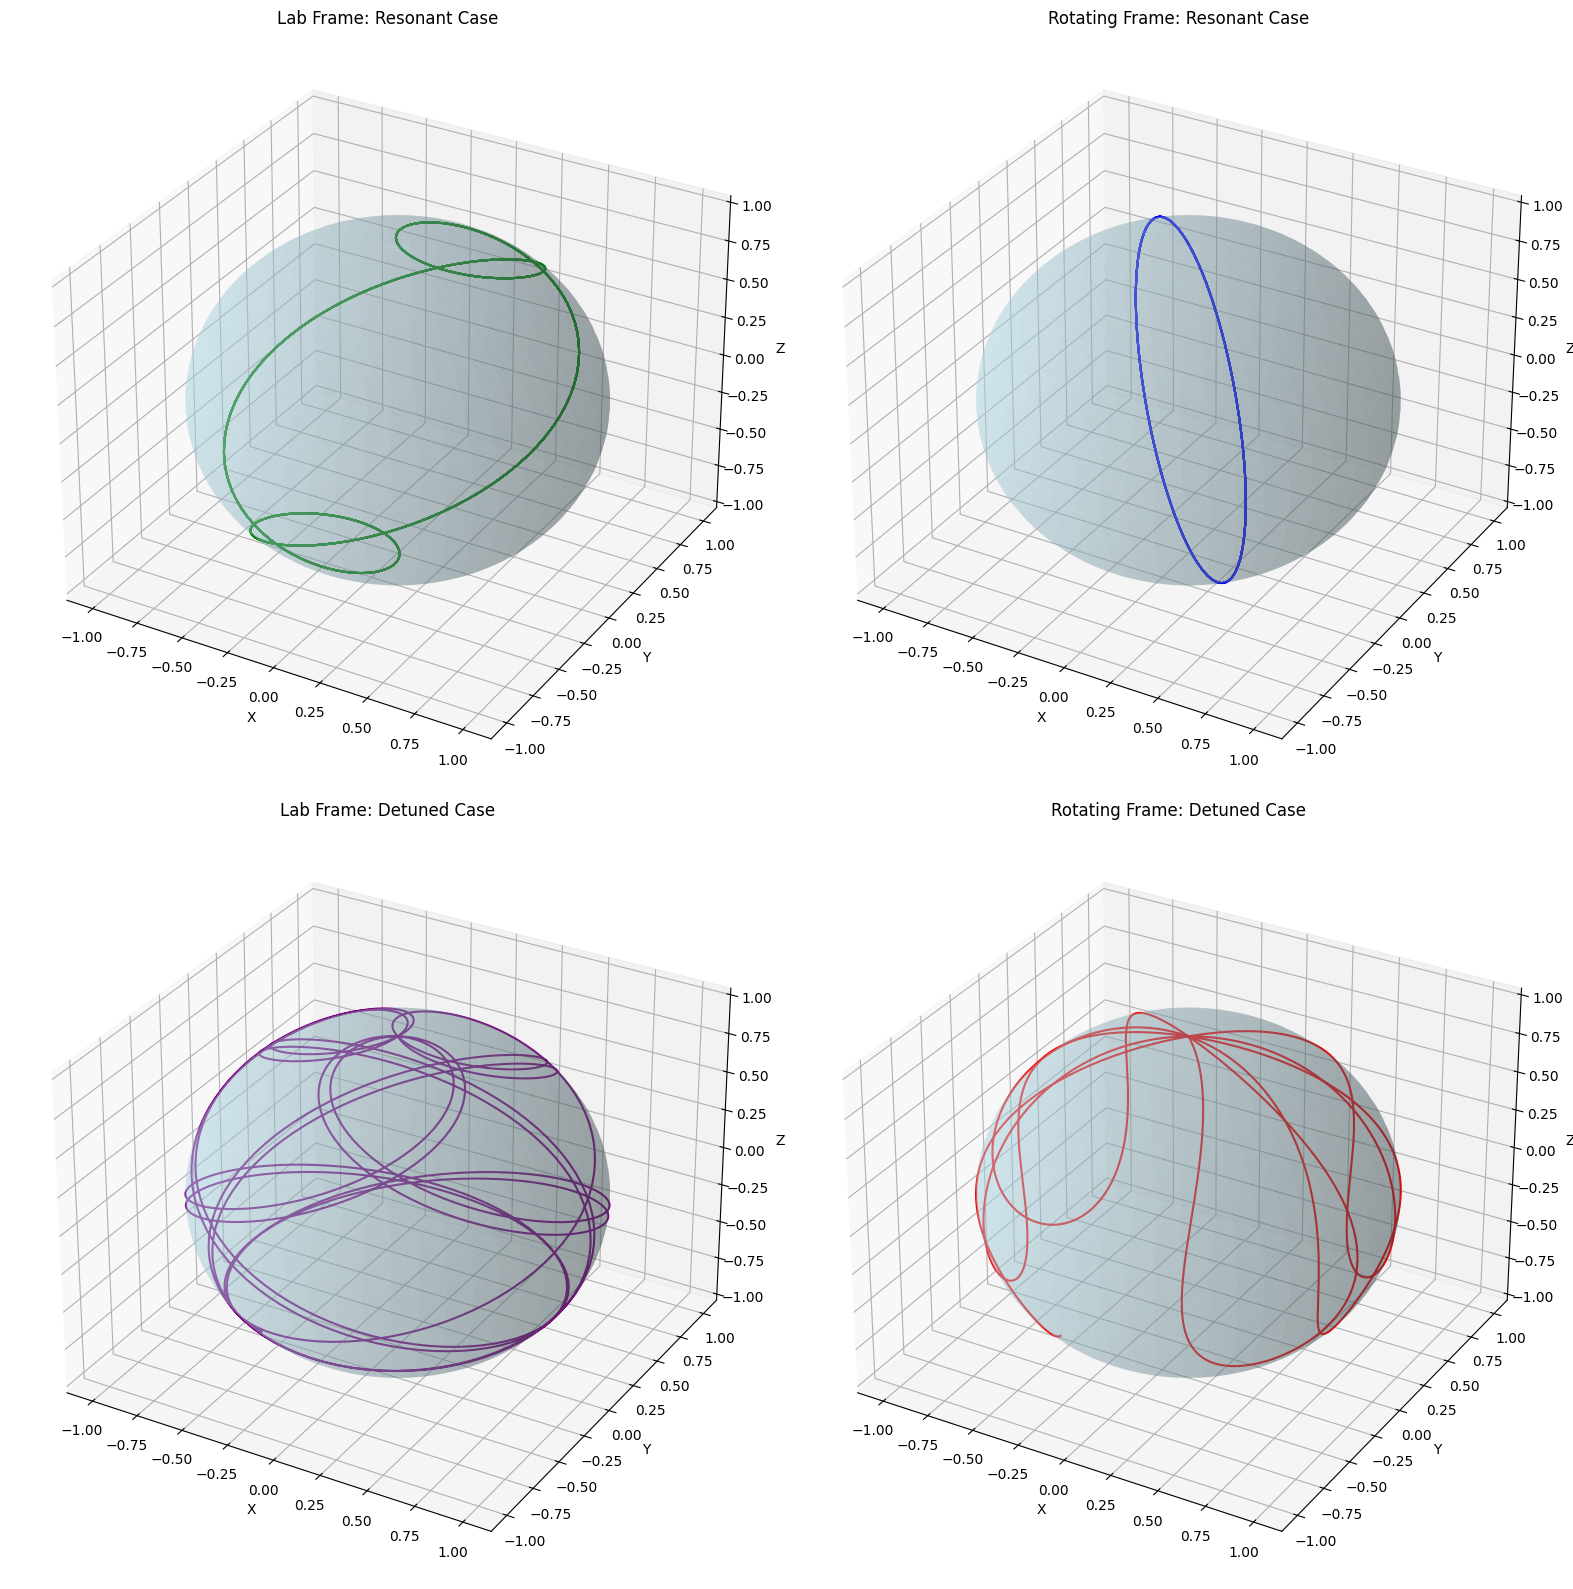

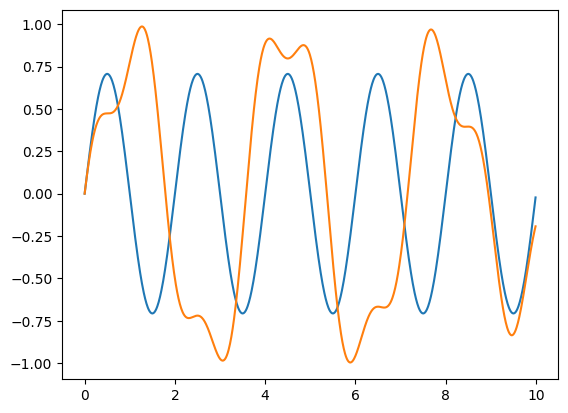

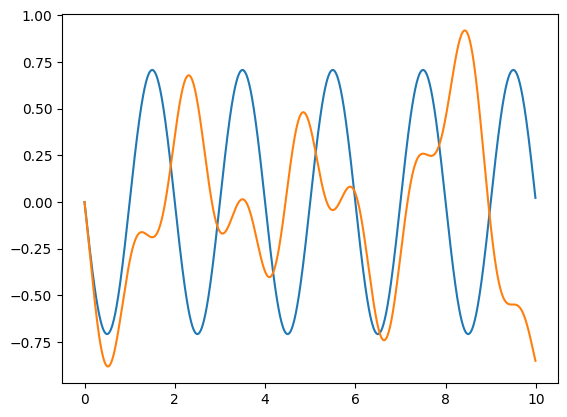

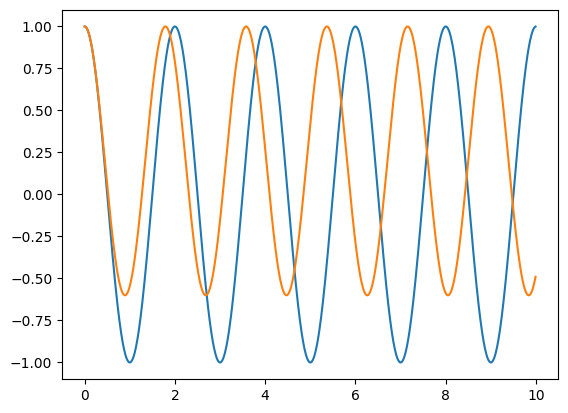

In [13]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega_0 = 2 * np.pi * 1  # Static field frequency (Hz)
Omega = 2 * np.pi * 0.5  # Rabi frequency (Hz)
delta = -0.5 * np.pi * 1.0  # Detuning (Hz)
omega_d_resonant = omega_0  # Resonant driving frequency
omega_d_detuned = omega_0 + delta  # Detuned driving frequency
t_max = 10  # Total time (s)
dt = 0.01  # Time step (s)
t = np.arange(0, t_max, dt)

# Pauli matrices and identity
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I = qeye(2)

# Initial state
psi0 = basis(2, 0)  # Qubit in |0⟩ state

# Function to define the Hamiltonian in the lab frame
def hamiltonian_lab(omega_0, omega_d, Omega):
    H_static = 0.5 * omega_0 * sz  # Static field in z-direction
    H_drive_x = [0.5 * Omega * sx, lambda t, args: np.cos(omega_d * t+np.pi/4)]  # Driving in x
    H_drive_y = [0.5 * Omega * sy, lambda t, args: np.sin(omega_d * t+np.pi/4)]  # Driving in y
    return [H_static, H_drive_x, H_drive_y]

# Simulate the dynamics
def simulate_dynamics(omega_d, omega_0, Omega):
    H = hamiltonian_lab(omega_0, omega_d, Omega)
    result = mesolve(H, psi0, t, [], [sx, sy, sz])
    bloch_vecs = np.array(result.expect)  # Extract <X>, <Y>, <Z>
    return bloch_vecs

# Rotating frame transformation
def transform_to_rotating_frame(bloch_vecs, omega_rot, t):
    x, y, z = bloch_vecs
    x_rot = x * np.cos(omega_rot * t) + y * np.sin(omega_rot * t)
    y_rot = -x * np.sin(omega_rot * t) + y * np.cos(omega_rot * t)
    z_rot = z  # z-component is invariant in rotation about z-axis
    return np.array([x_rot, y_rot, z_rot])

def calculate_bloch_vectors(omega_d, omega_0, Omega, t):
    bloch_vecs = simulate_dynamics(omega_d, omega_0, Omega)
    bloch_vecs_rot = transform_to_rotating_frame(bloch_vecs, omega_0, t)

    return bloch_vecs, bloch_vecs_rot

# Resonant and detuned cases
bloch_res_lab = simulate_dynamics(omega_d_resonant, omega_0, Omega)
bloch_det_lab = simulate_dynamics(omega_d_detuned, omega_0, Omega)

bloch_res_rot = transform_to_rotating_frame(bloch_res_lab, omega_0, t)
bloch_det_rot = transform_to_rotating_frame(bloch_det_lab, omega_0, t)

# Plot the Bloch sphere trajectories
fig = plt.figure(figsize=(16, 16))

def plot_bloch(ax, bloch_vecs, title, color):
    # Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.3)
    ax.plot(bloch_vecs[0], bloch_vecs[1], bloch_vecs[2], color=color)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)

# Resonant case
ax1 = fig.add_subplot(221, projection='3d')
plot_bloch(ax1, bloch_res_lab, "Lab Frame: Resonant Case", "green")

ax2 = fig.add_subplot(222, projection='3d')
plot_bloch(ax2, bloch_res_rot, "Rotating Frame: Resonant Case", "blue")

# Detuned case
ax3 = fig.add_subplot(223, projection='3d')
plot_bloch(ax3, bloch_det_lab, "Lab Frame: Detuned Case", "purple")

ax4 = fig.add_subplot(224, projection='3d')
plot_bloch(ax4, bloch_det_rot, "Rotating Frame: Detuned Case", "red")

plt.tight_layout()
plt.show()

plt.figure()
plt.plot(t, bloch_res_rot[0])
plt.plot(t, bloch_det_rot[0])
plt.show()

plt.figure()
plt.plot(t, bloch_res_rot[1])
plt.plot(t, bloch_det_rot[1])
plt.show()

plt.figure()
plt.plot(t, bloch_res_rot[2])
plt.plot(t, bloch_det_rot[2])
plt.show()


In [ ]:
b

In [17]:
import qutip

1/np.sqrt(2) * (qutip.basis(2, 0) + qutip.basis(2, 1))

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]

In [41]:
def rotate_vector(vector, axis, angle):
    """
    Rotate a vector by a given angle around a specified axis using Rodrigues' rotation formula.

    Parameters:
    vector (np.ndarray): The vector to be rotated.
    axis (np.ndarray): The axis around which to rotate the vector.
    angle (float): The angle by which to rotate the vector (in radians).

    Returns:
    np.ndarray: The rotated vector.
    """
    axis = axis / np.linalg.norm(axis)  # Normalize the rotation axis
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    rotated_vector = (vector * cos_angle +
                      np.cross(axis, vector) * sin_angle +
                      axis * np.dot(axis, vector) * (1 - cos_angle))
    return rotated_vector

# Example usage:
angles = np.linspace(0, 2 * np.pi, 100)
vector = np.array([0, 0, 1])
axis = np.array([1, 1, 1]) / np.sqrt(3)

rotated_vector = np.array([rotate_vector(vector, axis, angle) for angle in angles])
print(rotated_vector)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.72889249e-02 -3.59467092e-02  9.98657784e-01]
 [ 7.57699162e-02 -7.04064581e-02  9.94636542e-01]
 [ 1.15288024e-01 -1.03240489e-01  9.87952465e-01]
 [ 1.55684124e-01 -1.34316592e-01  9.78632468e-01]
 [ 1.96795555e-01 -1.63509633e-01  9.66714078e-01]
 [ 2.38456774e-01 -1.90702063e-01  9.52245289e-01]
 [ 2.80500029e-01 -2.15784388e-01  9.35284359e-01]
 [ 3.22756024e-01 -2.38655609e-01  9.15899585e-01]
 [ 3.65054611e-01 -2.59223632e-01  8.94169022e-01]
 [ 4.07225467e-01 -2.77405638e-01  8.70180172e-01]
 [ 4.49098785e-01 -2.93128414e-01  8.44029629e-01]
 [ 4.90505957e-01 -3.06328649e-01  8.15822692e-01]
 [ 5.31280250e-01 -3.16953191e-01  7.85672941e-01]
 [ 5.71257481e-01 -3.24959259e-01  7.53701778e-01]
 [ 6.10276675e-01 -3.30314615e-01  7.20037940e-01]
 [ 6.48180717e-01 -3.32997695e-01  6.84816978e-01]
 [ 6.84816978e-01 -3.32997695e-01  6.48180717e-01]
 [ 7.20037940e-01 -3.30314615e-01  6.10276675e-01]
 [ 7.53701778e-01 -3.24959259e-

In [ ]:
angle = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))
# Define the number of vectors and the angle step
num_vectors = 100
angle_step = 2*np.pi / num_vectors

# Generate equally spaced vectors along the rotation trajectory
rotated_vectors = np.array([rotate_vector(vec1, rotation_axis, angle) for i in range(num_vectors)])

rotated_vectors

array([[ 0.57735027,  0.57735027,  0.57735027],
       [ 0.55057688,  0.55057688,  0.62747924],
       [ 0.52163061,  0.52163061,  0.67513185],
       [ 0.49062571,  0.49062571,  0.72012001],
       [ 0.45768453,  0.45768453,  0.76226619],
       [ 0.42293708,  0.42293708,  0.80140406],
       [ 0.38652049,  0.38652049,  0.83737914],
       [ 0.34857847,  0.34857847,  0.87004948],
       [ 0.30926078,  0.30926078,  0.89928613],
       [ 0.26872258,  0.26872258,  0.9249737 ],
       [ 0.22712386,  0.22712386,  0.94701083],
       [ 0.18462877,  0.18462877,  0.96531054],
       [ 0.14140505,  0.14140505,  0.9798006 ],
       [ 0.09762326,  0.09762326,  0.99042385],
       [ 0.0534562 ,  0.0534562 ,  0.99713834],
       [ 0.00907817,  0.00907817,  0.99991758],
       [-0.03533569, -0.03533569,  0.99875061],
       [-0.07961009, -0.07961009,  0.99364202],
       [-0.12357031, -0.12357031,  0.98461198],
       [-0.16704285, -0.16704285,  0.97169613],
       [-0.20985615, -0.20985615,  0.954

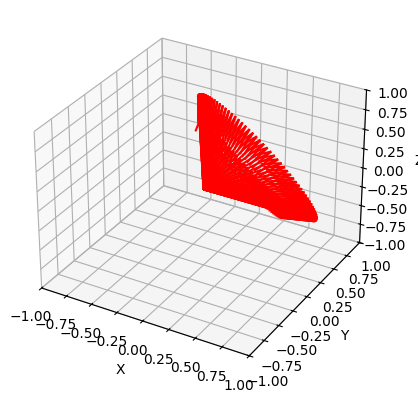

In [42]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original vectors
# for vector in vectors:
#     ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='b')

# Plot the rotated vectors
for vector in rotated_vector:
    ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='r')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.show()

In [32]:
vec1 = 1/np.sqrt(3) * np.array([1, 1, 1]) # in x,y,z basis
vec2 = np.array([0, 0, 1])

np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))) * (180/np.pi)
angle = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))

# Generate random vectors
num_vectors = 10
vectors = np.random.randn(num_vectors, 3)

# Normalize vectors
vectors = vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]

# Rotate vectors to have the same angle with vec1
rotation_axis = np.cross(vec1, vec2)
rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)

def rotate_vector(vector, axis, angle):
    axis = axis / np.linalg.norm(axis)
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    return (vector * cos_angle +
            np.cross(axis, vector) * sin_angle +
            axis * np.dot(axis, vector) * (1 - cos_angle))

rotated_vectors = np.array([rotate_vector(v, rotation_axis, angle) for v in vectors])
rotated_vectors

array([[-0.7031762 ,  0.62686442, -0.33553575],
       [ 0.82531515, -0.18041574,  0.53507482],
       [-0.37591593,  0.39562582,  0.83795431],
       [-0.27157802, -0.95186658,  0.14211049],
       [ 0.03386   ,  0.74069864,  0.67098362],
       [-0.48905981,  0.45336439,  0.74517195],
       [ 0.22365482, -0.97366647,  0.04418286],
       [ 0.3556164 , -0.6866605 , -0.63406177],
       [ 0.85663187,  0.36331945,  0.36630701],
       [ 0.1142261 , -0.7939619 ,  0.5971406 ]])